In [31]:
using Random
using StatsBase

function initialize_network(T::Int, r::Int)
    k_in = zeros(Int, T)
    k_out = zeros(Int, T)

    for t in 1:(r + 1)
        k_in[t] = r
        k_out[t] = (r + 1) - t
    end

    return k_in, k_out
end

function network_popularity(T::Int, r::Int, w::Float64)
    # 初期条件の設定
    k_in, k_out = initialize_network(T, r)
    l = zeros(Float64, T)

    # ネットワークの進化
    for t in (r + 2):T
        k_in[t] = r
        # 人気度の更新
        l .= k_in .+ w .* k_out

        # 人気度が0より大きいアリを選択可能なリストに追加
        popular_ants = findall(x -> x > 0, l)

        # 人気度の合計
        total_popularity = sum(l[popular_ants])

        # 既存のノードから r または r' アリを選択
        num_links = min(r, length(popular_ants))

        # 重み付きサンプリングでアリを選択
        probabilities = l[popular_ants] / total_popularity
        selected_ants = sample(popular_ants, Weights(probabilities), num_links, replace=false)

        # 選ばれたアリの k_out を更新
        k_out[selected_ants] .+= 1
    end

    return k_out
end

function network_lattice(T::Int, r::Int)
    # 初期条件の設定
    k_in, k_out = initialize_network(T, r)

    # ネットワークの進化
    for t in (r + 2):T
        k_in[t] = r

        # 既存のノードの出次数を更新
        k_out[1:max(1, t - r - 1)] .= r
        if t - r > 0
            k_out[(t - r):(t - 1)] .= (r - 1):-1:0
        end
    end

    return k_out
end

function network(T::Int, r::Int, w::Float64)
    if w == -1.0
        return network_lattice(T, r)
    else
        return network_popularity(T, r, w)
    end
end



# パラメータの設定
T = 10000
r = 100
w = 1.0

# ネットワークモデルの実行
k_out_result = network(T, r, w)


10000-element Vector{Int64}:
 1547
 1756
 1560
 1740
 1600
 1782
 1759
 1690
 1649
 1737
 1672
 1557
 1720
    ⋮
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0

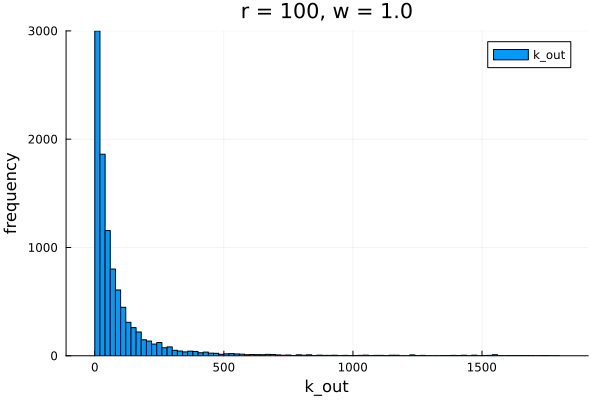

In [32]:
# k_out_resultの分布をプロット
using Plots

histogram(k_out_result, bins=100, label="k_out", xlabel="k_out", ylabel="frequency", title="r = $r, w = $w")


In [33]:
k_out_result = network(T, r, 0.0)


10000-element Vector{Int64}:
 570
 578
 543
 571
 555
 523
 544
 570
 548
 577
 559
 559
 524
   ⋮
   0
   0
   1
   0
   0
   0
   0
   1
   0
   0
   0
   0

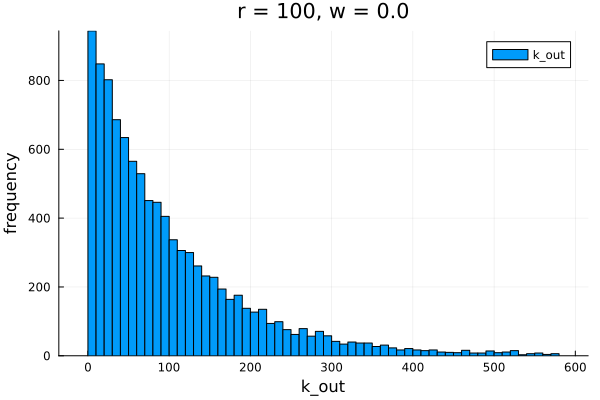

In [34]:
# k_out_resultの分布をプロット
using Plots

histogram(k_out_result, bins=100, label="k_out", xlabel="k_out", ylabel="frequency", title="r = $r, w = 0.0")


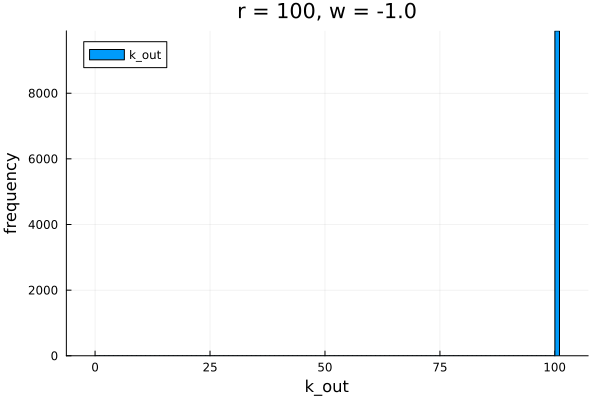

In [35]:
k_out_result = network(T, r, -1.0)

histogram(k_out_result, bins=100, label="k_out", xlabel="k_out", ylabel="frequency", title="r = $r, w = -1.0")


In [37]:
k_out_result = network(T, r, -0.9)


10000-element Vector{Int64}:
 112
 112
 112
 112
 112
 112
 112
 112
 112
 112
 112
 112
 112
   ⋮
   0
   1
   0
   3
   2
   0
   0
   1
   1
   0
   1
   1

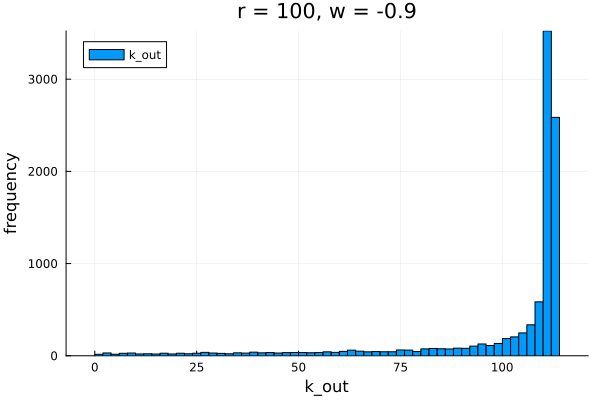

In [38]:
histogram(k_out_result, bins=100, label="k_out", xlabel="k_out", ylabel="frequency", title="r = $r, w = -0.9")
